# Boundary conditions on a cylindrical geometry

In [14]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
try:
    import seaborn as sns
except ImportError:
    print('Seaborn not found')
%matplotlib inline
from IPython.display import display

from tyssue import config
from tyssue import Sheet, SheetGeometry as geom
from tyssue.dynamics import SheetModel as model

from tyssue.solvers.sheet_vertex_solver import Solver as solver
from tyssue.dynamics.sheet_isotropic_model import isotropic_relax

from tyssue.draw.plt_draw import quick_edge_draw, plot_forces
from tyssue.draw.threejs_draw import view_3js

from tyssue.io import hdf5

from tyssue.core.objects import get_opposite
from tyssue.core.generation import create_anchors

In [7]:
import tyssue
tyssue.__version__

'0.0.2.dev0+1762a8d'

In [9]:
# h5store = 'before_apoptosis.hf5'
h5store = '../data/hf5/small_hexagonal.hf5'

datasets = hdf5.load_datasets(h5store,
                              data_names=['face',
                                          'vert',
                                          'edge'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('emin', datasets, specs)
geom.update_all(sheet)

# ## Boundary conditions
sheet.vert_df.is_active = 1

sheet.edge_df['opposite'] = get_opposite(sheet.edge_df)
create_anchors(sheet)
anchor_tension = 0.6

nondim_specs = config.dynamics.quasistatic_sheet_spec_anchors()
nondim_specs['edge']['anchor_tension'] = anchor_tension
dim_model_specs = model.dimentionalize(nondim_specs)
sheet.update_specs(dim_model_specs, reset=True)

geom.update_all(sheet)

In [12]:
renderer, line = view_3js(sheet)
display(renderer)

In [13]:

min_settings = {
    'minimize': {
        'options': {
            'disp': False,
            'ftol': 1e-6,    
            'gtol': 1e-8},
        }
    }

res = solver.find_energy_min(sheet, geom, 
                             model, **min_settings)
print(res['success'])

True


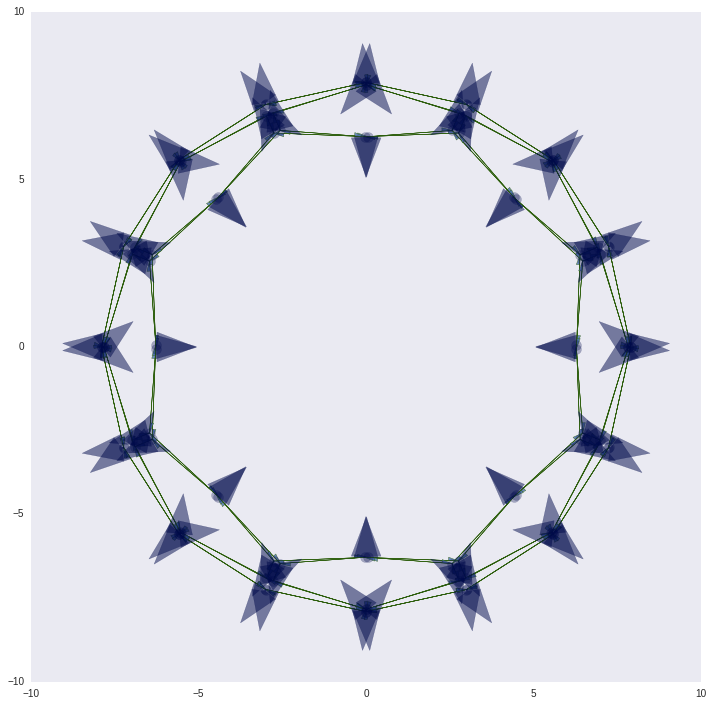

In [15]:

fig, ax = plot_forces(sheet, geom, model, coords=['y', 'x'], scaling=10)
fig.set_size_inches(12, 12)

In [16]:
renderer, line = view_3js(sheet)
display(renderer)